# Climate Change Belief Analysis


by Classification_JS1_DSFT21

# Introduction 
Several companies are built around lessening one’s environmental impact or carbon footprint. This is because they offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. This model together will the accompanying app will help Geo-Environmental Consultation companies who are turning to social media to obtain valuable information about job applicants and to monitor the activities of their employees in relation to the values they have towards the company's projects and beliefs surrounding the ever changing global environment.

Providing an accurate and robust solution to this task will provide access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. The app launched on **streamlit** is also an intuitive, easy to use, simple and the customer can rely on the product it.

Authors: John Bosman, Kabelo Mbewe, Khwatsi Hlungwani, Reneilwe Mhahlele, Tshegofatso Letlape and Mathew van Wyk

# Table of Contents

1. Intro to Comet
2. Importing Libraries
3. Importing Dataset
4. Data Preprocessing
5. Exploratory Data Analysis
6. Feature Engineering and Selection
7. Model Selection
8. Submission
9. Conclusion

### Comet

Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of the experiements- allowing for reproducing of results, or going back to a previous version of the experiment.

In [ ]:
pip install comet_ml

In [ ]:
# Loading in the comet_ml tool
#from comet_ml import Experiment
    
# Setting the API key, saved as environment variable
# experiment = Experiment(api_key="your api key here",
        # project_name="current project your are working on", workspace="your workspace name")
# experiment.display()

# Importing Libraries

In [1]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

# Quality of all figures in notebook
mpl.rcParams['figure.dpi'] = 180

# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download()

In [81]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# Importing dataset

In [2]:
# Loading in the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv('sample_submission.csv')

# Data Preprocessing

## Summary Statistics

In [3]:
# Looking at the predicted output
sample_submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [4]:
# Looking at the first few entries in the dataset
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
# Shape of the dataset
train.shape

(15819, 3)

In [6]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [7]:
# Looking at the numbers of possible classes in our sentiment
train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

The tweets sentiments are divided into four (4) classes:

*  [ 2 ] - News: tweets links to factual news about climate change
*  [ 1 ] - Pro: tweets that supports the belief of man-made climate change
*  [ 0 ] - Neutral: tweets that neither support nor refutes the belief of man-made climate change
*  [-1 ] - Anti (Negative): tweets that does not believe in man-made climate change

In [8]:
# Looking at the how the messages are distributed across the sentiment
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


## Missing values

In [9]:
# Checking for missing values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Fortunately, there are no missing values in our dataset.

In [10]:
# Checking whether a character is white-space character or not
print(len(train['message']))
print(sum(train['message'].apply(lambda x: x.isspace())))

15819
0


In [11]:
# Sample tweet
tweet = train.iloc[6,1]
print(tweet)

RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R


Text(0.5, 1.0, 'Distribution of target labels')

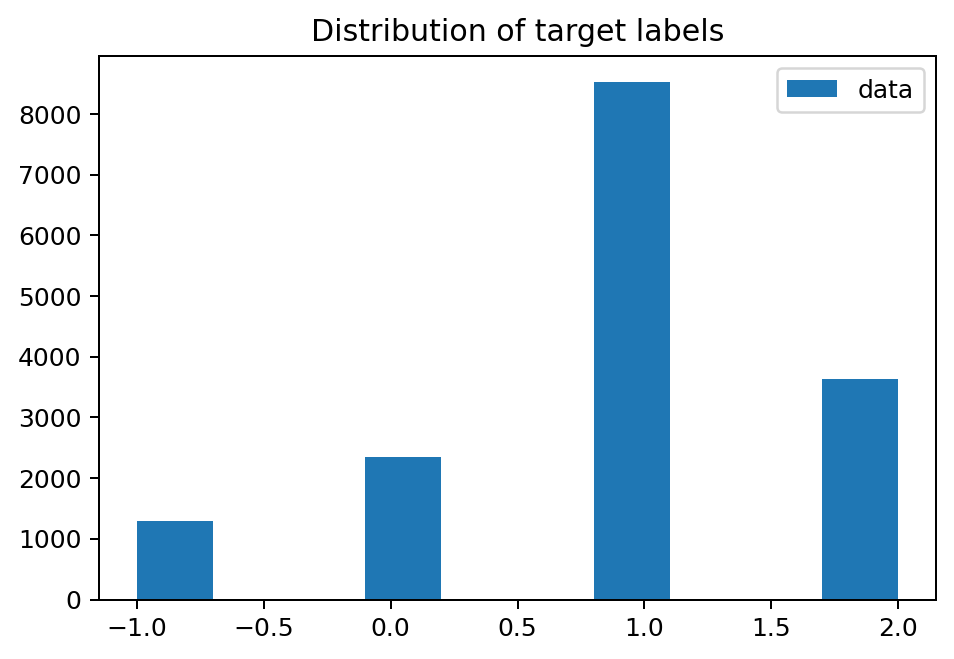

In [12]:
# Visualizing the distribution of the target 
plt.hist(train['sentiment'], label='data');
plt.legend();
plt.title('Distribution of target labels')

It is notable that there is an imbalance of classes in the daset and these tend to be a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. This can cause problems as most algorithms are designed to maximize accuracy and reduce error. Therefore we will address and take care of the class imbalance in our EDA

Text(0, 0.5, 'Density')

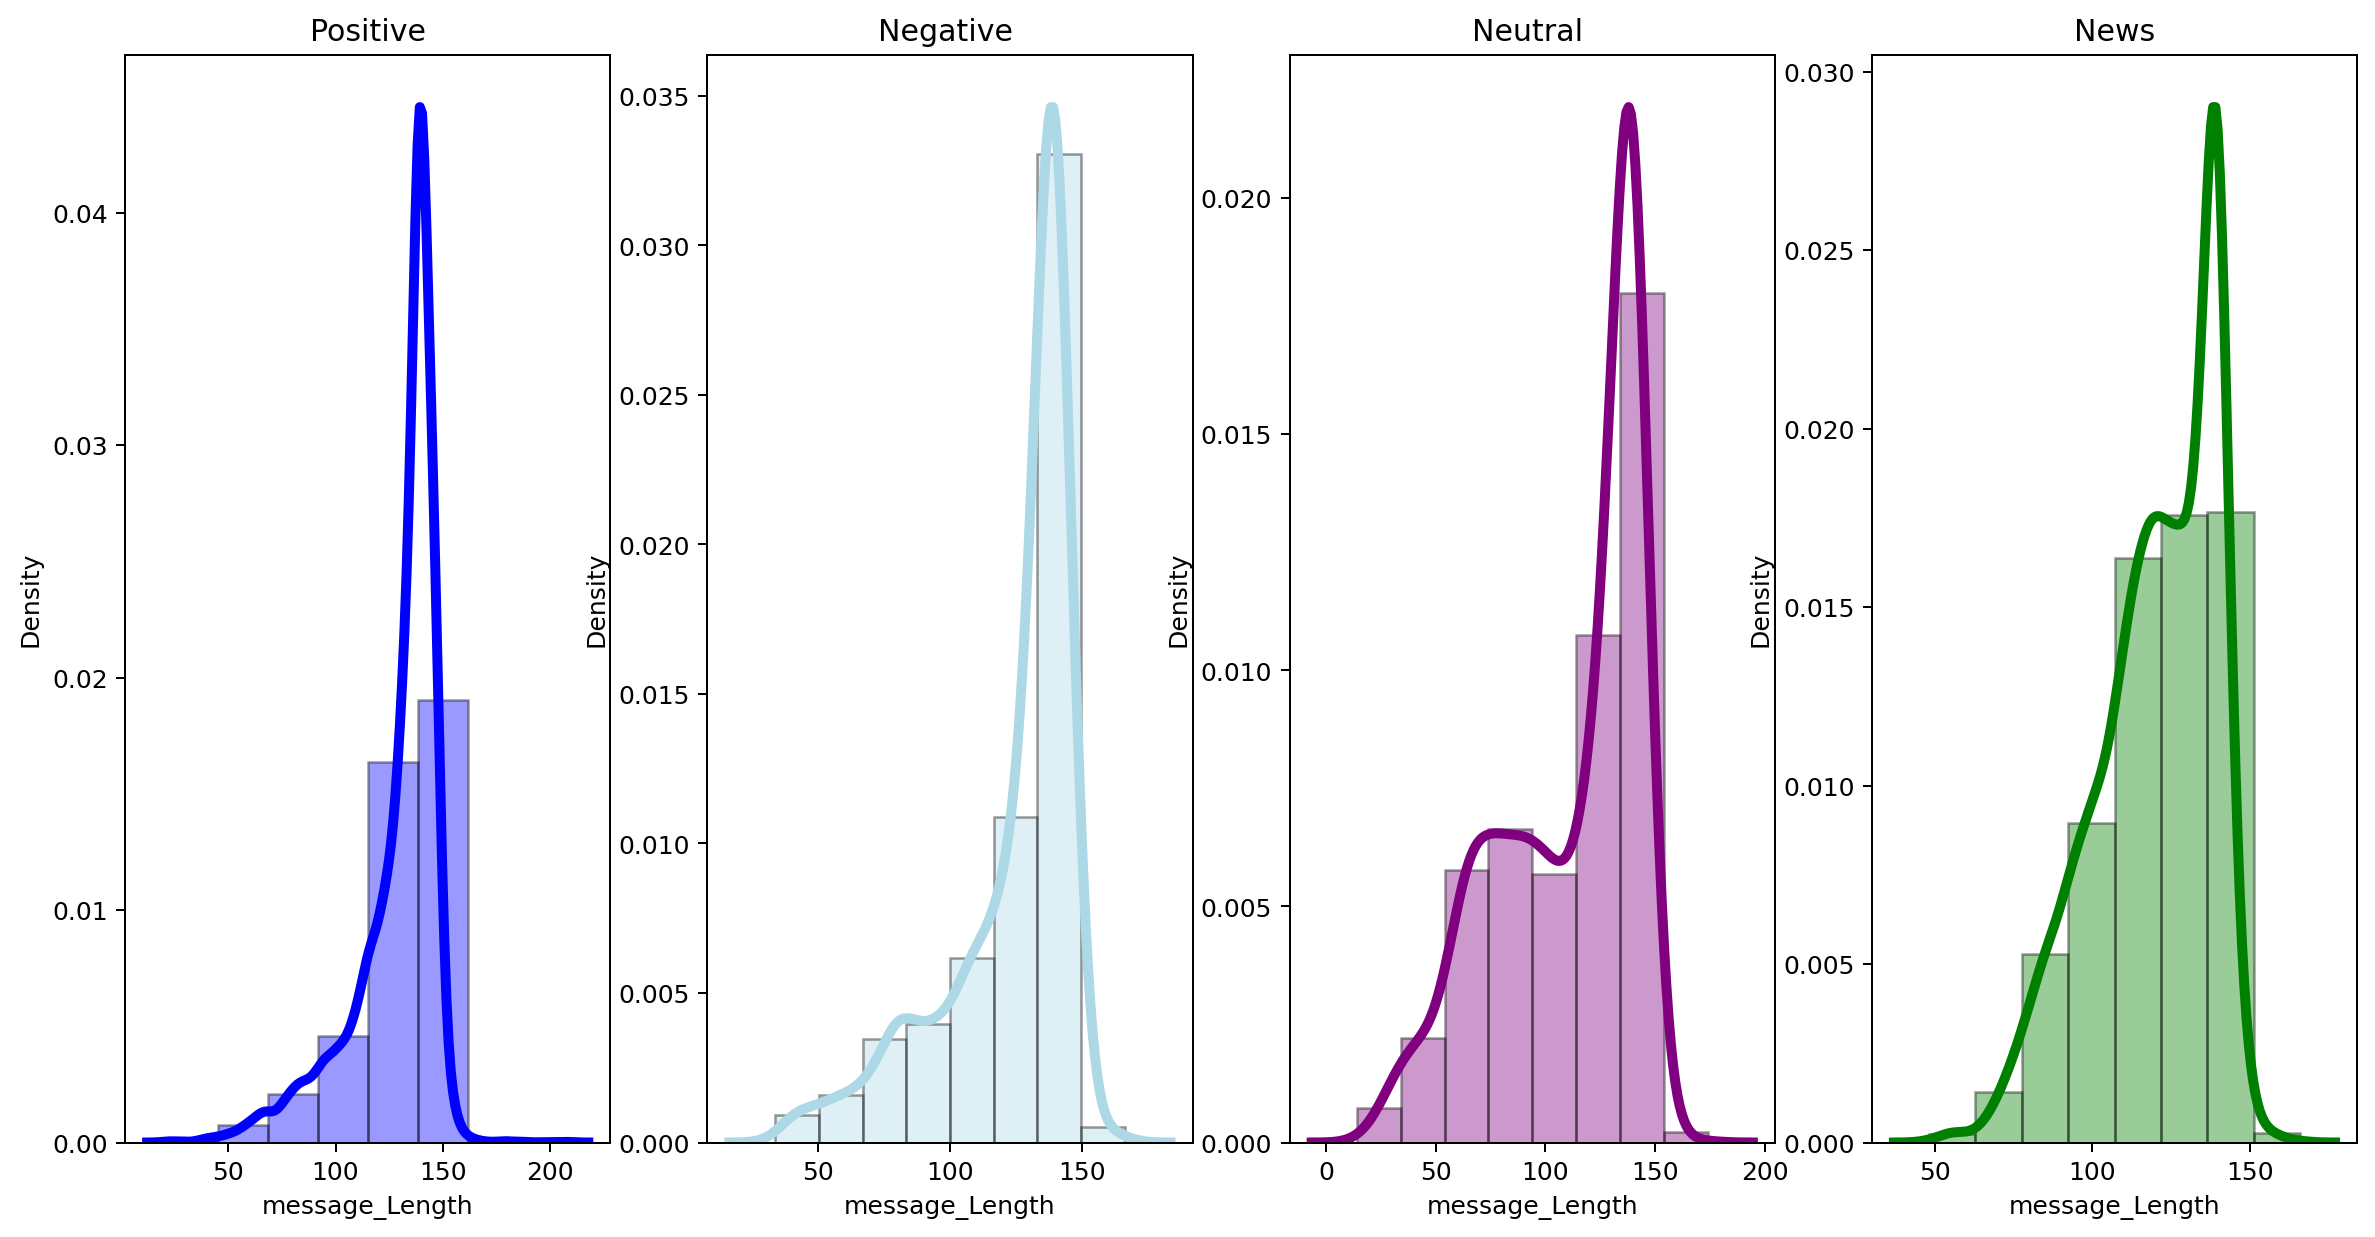

In [13]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(train[train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train[train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train[train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(train[train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

The average length of messages for all sentiments is not suprising as a tweet is only limited to 140 characters. However, the density contrast between positive and negative sentiments is interesting and will make for more unpacking later in the EDA. Now that we have explored our dataset, we can begin perfoming some analyses on it.

# Exploratory Data Analysis

We perform investigative and detective analysis of our data to see if we can unearth any insights.

In [14]:
working_df = train.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

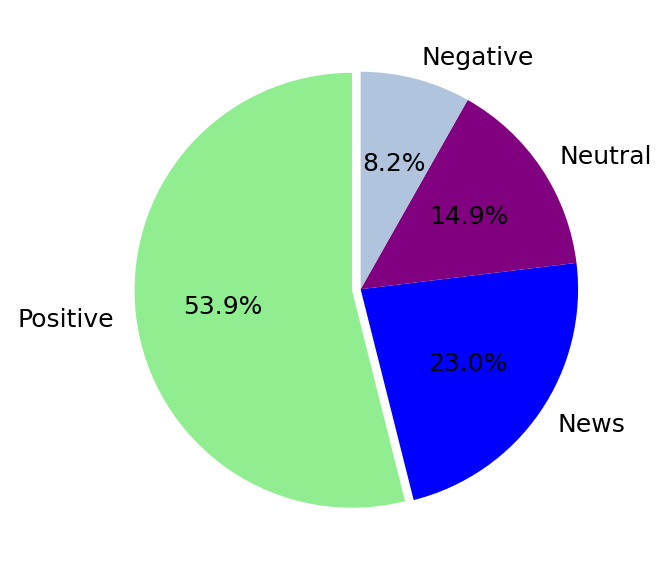

In [15]:
# checking the numerical distribution
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

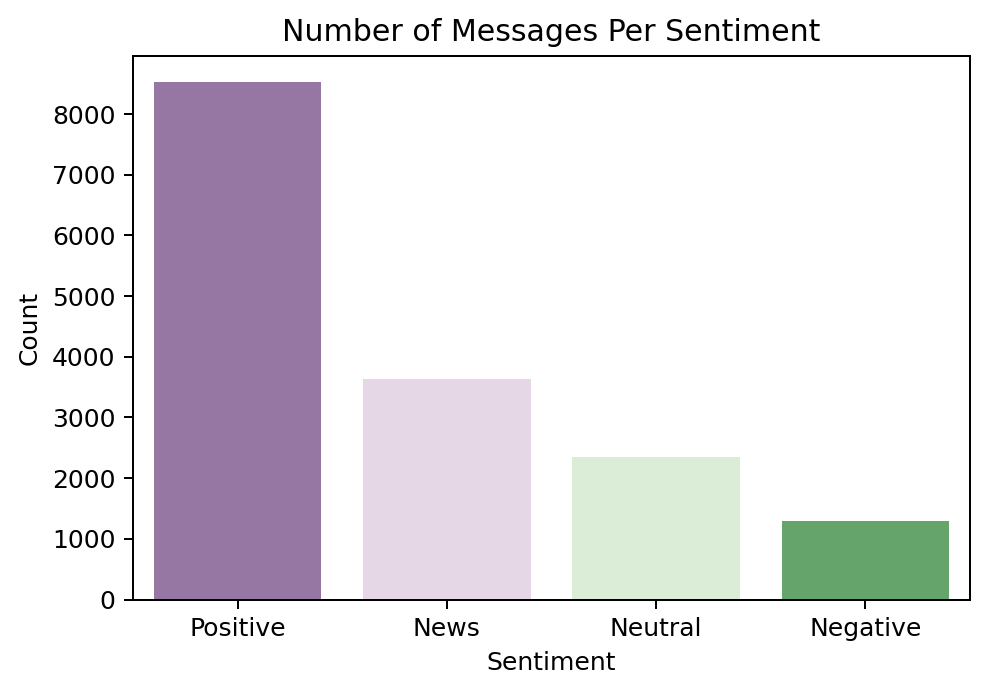

In [16]:
sns.countplot(x='sentiment' ,data = working_df, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

As we noted earlier that there is an imbalance of classes in the daset, this can lead to a disproportionate ratio of observations in each class, causing problems as most algorithms are designed to maximize accuracy and reduce error. We therefore continue to analyse and evaluate for more insights to be derived from the dataset as we prepared to balance later on in the analysis.

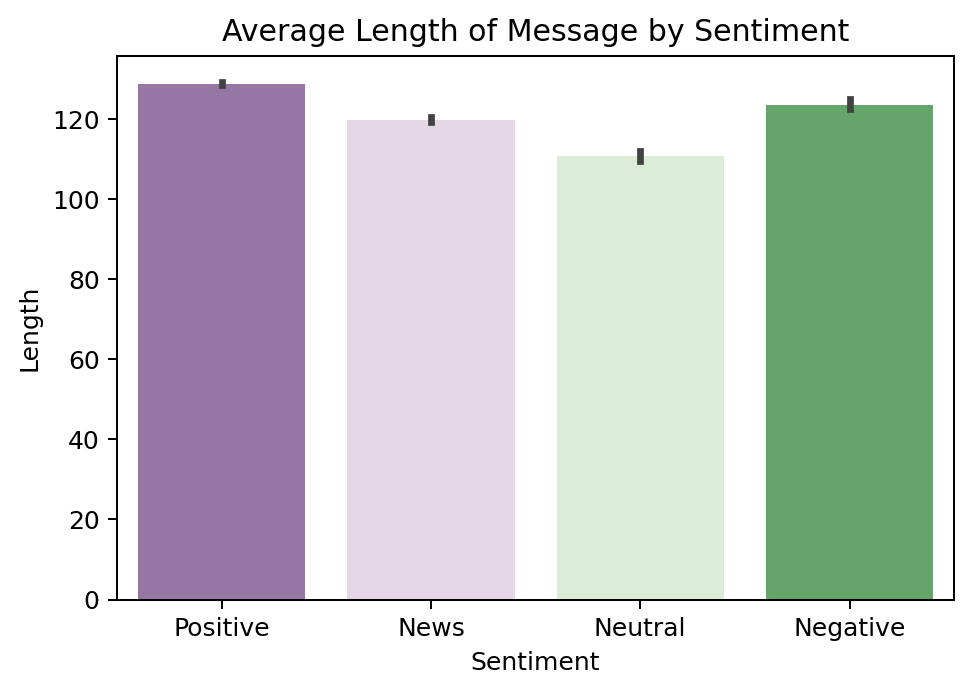

In [17]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

In [18]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

# Creating a column of hastags
working_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in working_df.message]

In [19]:
# Generating Counts of users
counts = working_df[['message',
                     'users']].groupby('users',
                                       as_index=False).count().sort_values(by='message', ascending=False)

In [20]:
# Top 5 most popular
counts.head()

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


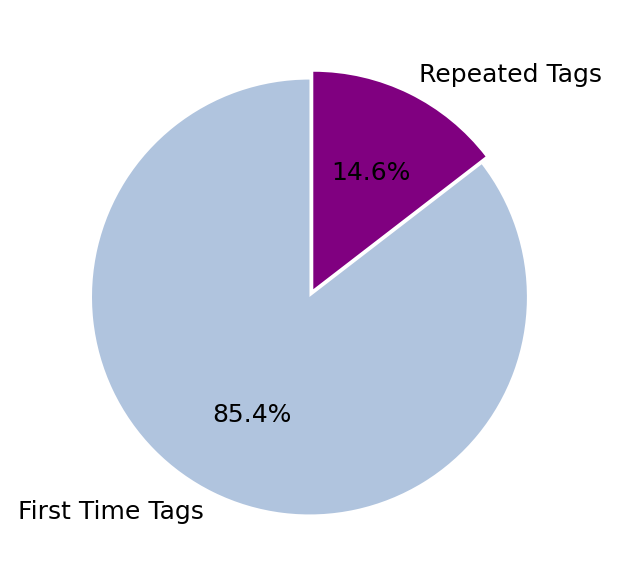

In [21]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']),
          sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.show()

In [22]:
repeated_tags_rate = round(sum(np.array(counts['message']) > 1)*100/len(counts['message']), 1)
print(f"{repeated_tags_rate} percent of the data are from repeated tags")

14.6 percent of the data are from repeated tags


In [23]:
first_time_tags = round(sum(np.array(counts['message']) == 1)*100/len(counts['message']), 1)
print(f"{first_time_tags} percent of the data are from first time tags")

85.4 percent of the data are from first time tags


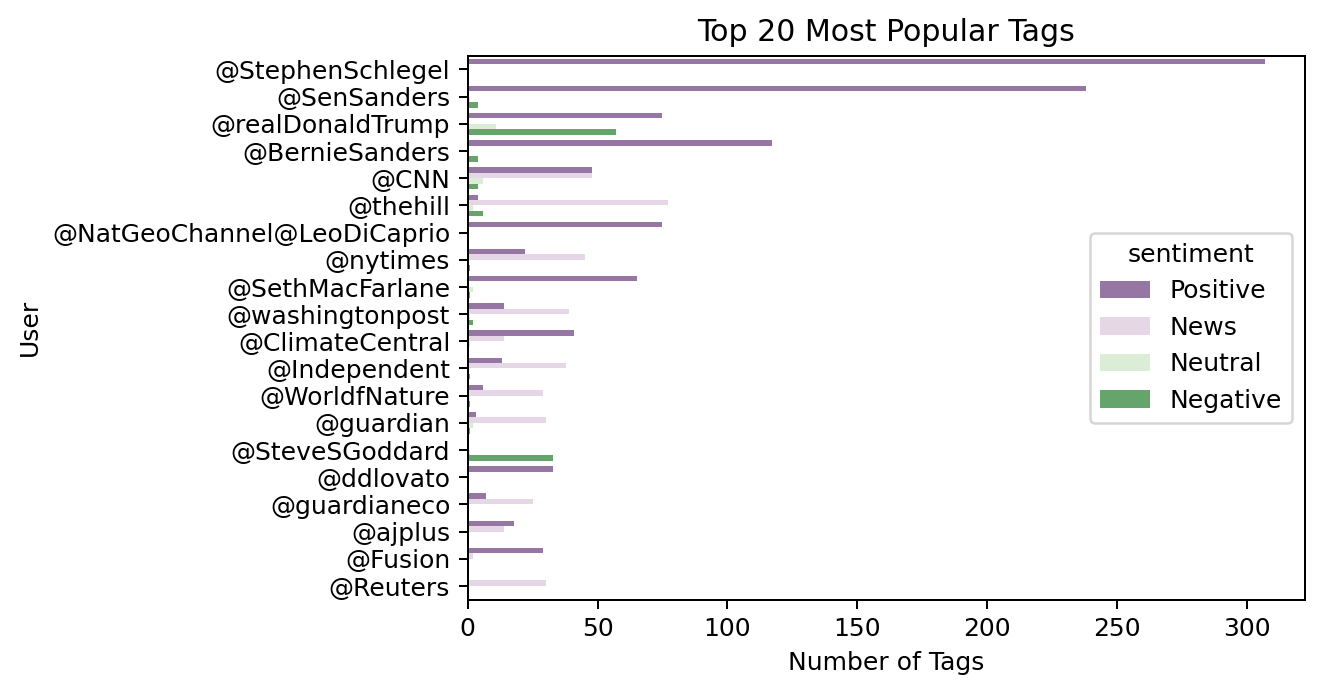

In [24]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=working_df, palette='PRGn',
              order=working_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()

Now that we've had a look at the tweets themselves as well as the users, we now analyse the hastags:

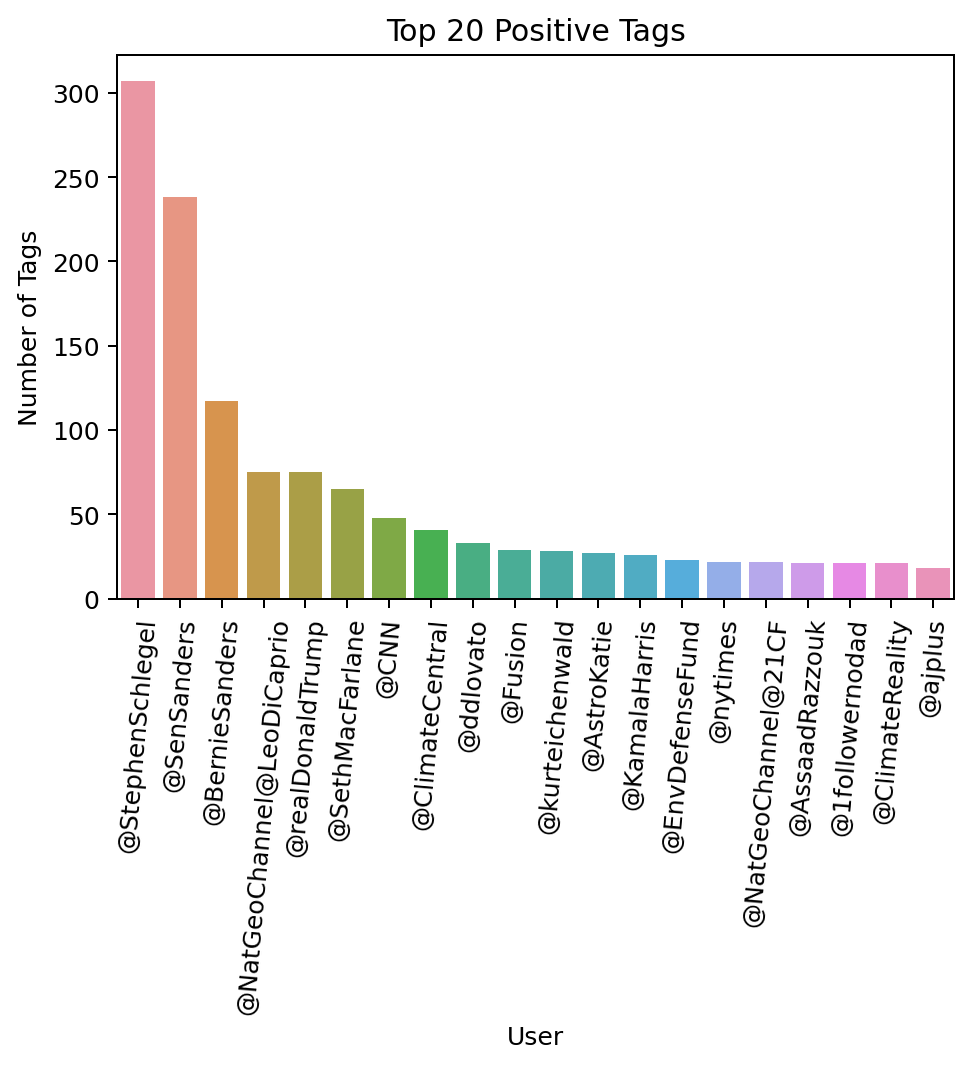

In [25]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'Positive'],
              order=working_df[working_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.xticks(rotation=85)
plt.show()

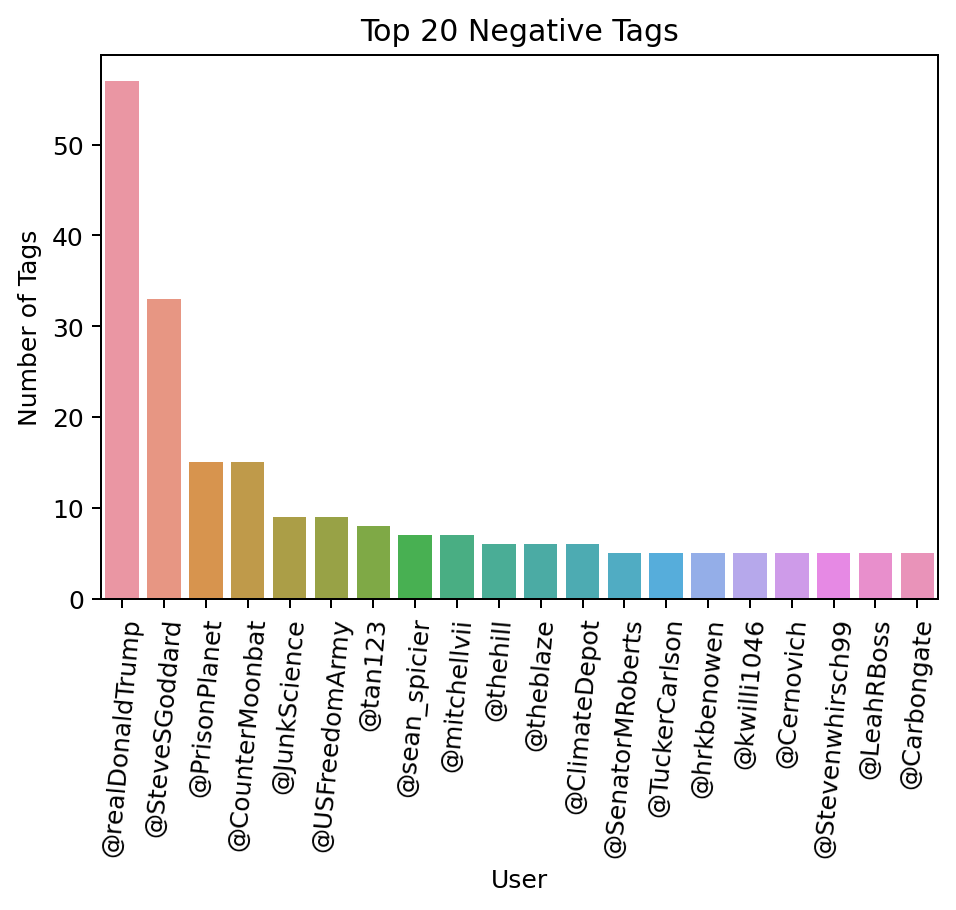

In [26]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'Negative'],
              order=working_df[working_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.xticks(rotation=85)
plt.show()

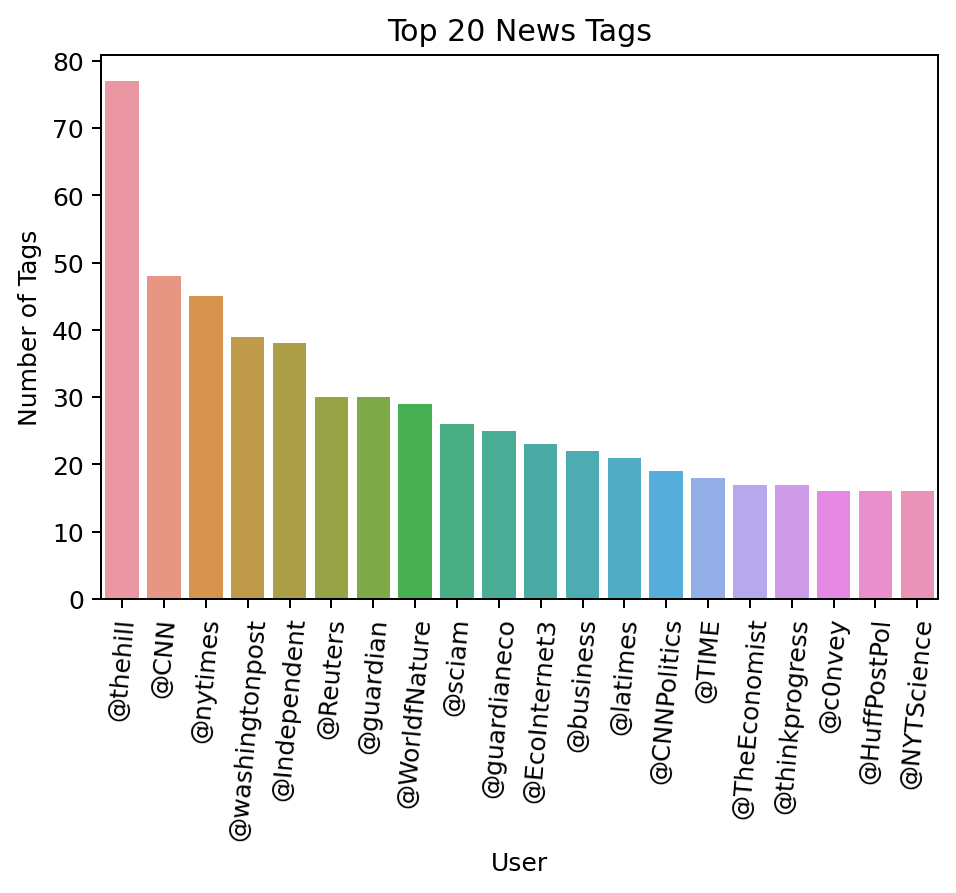

In [27]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'News'],
              order=working_df[working_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.xticks(rotation=85)
plt.show()

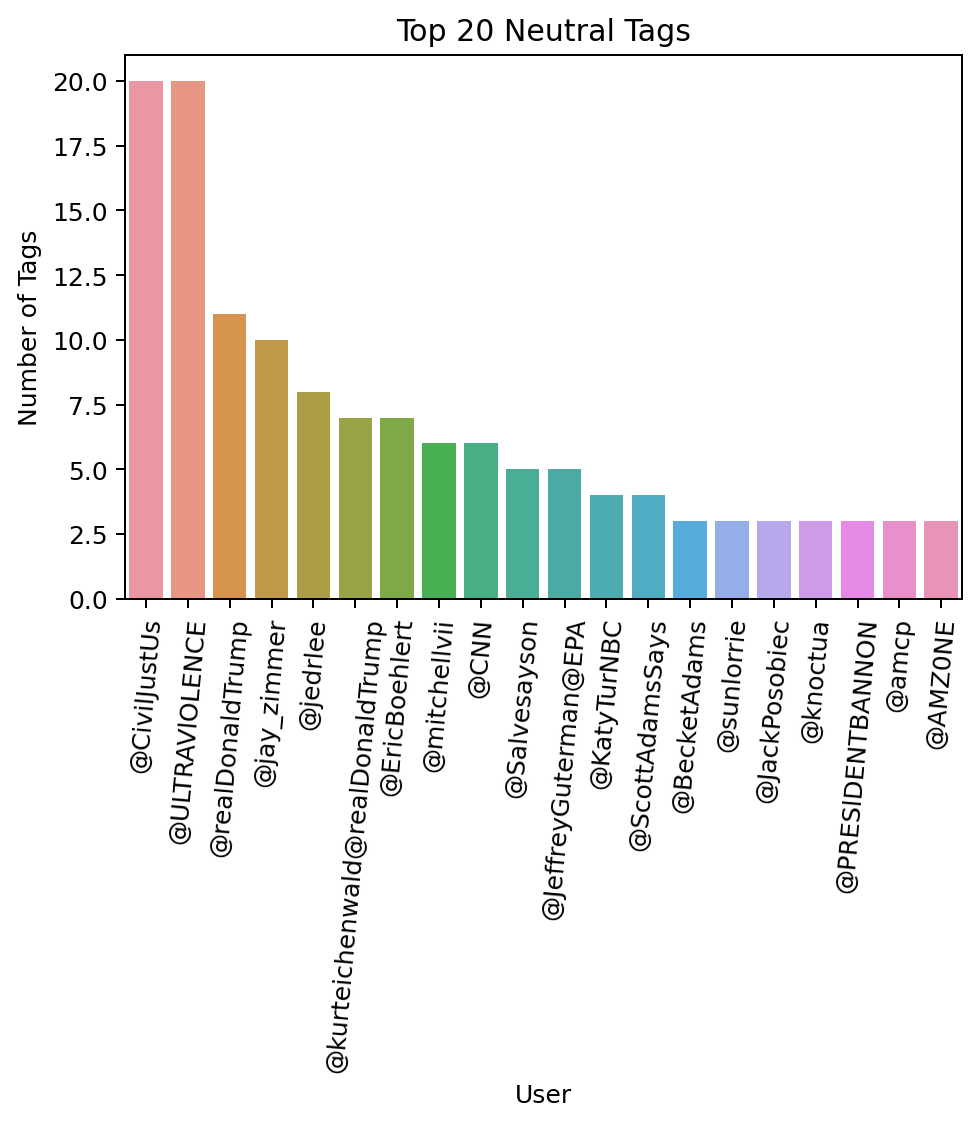

In [28]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'Neutral'],
              order=working_df[working_df['sentiment'] == 'Neutral'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Neutral Tags')
plt.xticks(rotation=85)
plt.show()

### Cleaning text data

In [29]:
df_train = train.copy() #creating copy of dataset to clean

stop_words = set(stopwords.words('english')) #creating list of stop words to be removed
stop_words |= {'global', 'warming', 'climate', 'change', 'u'} #adding common terms to stop words
pattern = r'(\S*https?:\S*)|(@\w+)|(#\w+)' #creating patterns to be removed '@handle', '#handle' and urls ('http://')
df_train['internet_remove'] = df_train.message.str.replace(pattern, '') #removing pattern defined elements
df_train['internet_remove'] = df_train.internet_remove.str.replace('RT : ', ' ') #removing retweet ('RT :')
df_train['internet_remove'] = df_train.internet_remove.str.replace('\n', ' ') #removing '\n'
df_train['internet_remove'] = df_train['internet_remove'].str.lower() #converting all strings to lowercase
df_train['clean_txt'] = df_train['internet_remove'].str.replace('[^\w\s]', ' ') #removing punctuation
df_train['clean_txt'] = df_train['clean_txt'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) #removing stop words

df_train['clean_txt'] = df_train['clean_txt'].apply(lambda x: re.sub('\w*\d\w*','', x)) #removing digits
df_train = df_train.drop(['message', 'internet_remove'], axis = 1) #dropping old unnecessary columns

df_train.head()

,sentiment,tweetid,clean_txt
0,1,625221,polyscimajor epa chief think carbon dioxide ma...
1,1,126103,like lack evidence anthropogenic
2,2,698562,researchers say three years act late
3,1,573736,wired pivotal year war
4,1,466954,racist sexist denying bigot leading polls


In [30]:
# Creating copy of dataset to clean
df_test = test.copy()

# Creating list of stop words to be removed
stop_words = set(stopwords.words('english')) 
# Adding common terms to stop words
stop_words |= {'global', 'warming', 'climate', 'change', 'u'} 
# Creating patterns to be removed '@handle', '#handle' and urls ('http://')
pattern = r'(\S*https?:\S*)|(@\w+)|(#\w+)' 
# Removing pattern defined elements
df_test['internet_remove'] = df_test.message.str.replace(pattern, '')
# Removing retweet ('RT :')
df_test['internet_remove'] = df_test.internet_remove.str.replace('RT : ', ' ')
# Removing '\n'
df_test['internet_remove'] = df_test.internet_remove.str.replace('\n',' ') 
# Converting all strings to lowercase
df_test['internet_remove'] = df_test['internet_remove'].str.lower() 
# Removing punctuation
df_test['clean_txt'] = df_test['internet_remove'].str.replace('[^\w\s]',' ') 
# Removing stop words
df_test['clean_txt'] = df_test['clean_txt'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                      if word not in (stop_words)]))
# Removing digits
df_test['clean_txt'] = df_test['clean_txt'].apply(lambda x: re.sub('\w*\d\w*','', x)) 
# Dropping old unnecessary columns
df_test = df_test.drop(['message', 'internet_remove'], axis = 1) 

df_test.head()

,tweetid,clean_txt
0,169760,europe looking china make sure alone fighting
1,35326,combine polling staffers womens rights fascist...
2,224985,scary unimpeachable evidence already
3,476263,putin got jill trump believe thinks hoax
4,872928,female orgasms cause sarcastic republican


Seperating sentiments to create word clouds to the most common words associated with each type of opinion:

In [31]:
df_pos = df_train.loc[df_train['sentiment'] == 1] #positive reviews
df_neg = df_train.loc[df_train['sentiment'] == -1] #negative reviews
df_neu = df_train.loc[df_train['sentiment'] == 0] #neutral reviews
df_new = df_train.loc[df_train['sentiment'] == 2] #news reviews

In [32]:
pos_string = df_pos['clean_txt'].str.cat(sep = ' ')
neg_string = df_neg['clean_txt'].str.cat(sep = ' ')
neu_string = df_neu['clean_txt'].str.cat(sep = ' ')
new_string = df_new['clean_txt'].str.cat(sep = ' ')

Positive WordCloud:

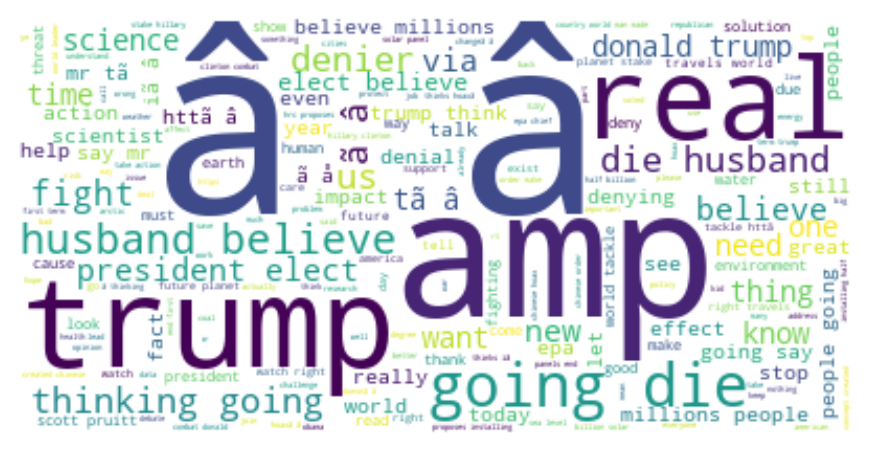

In [33]:
pos_cloud = WordCloud(background_color='white').generate(pos_string) #creating and generating word cloud image 
plt.imshow(pos_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

Negative WordCloud:

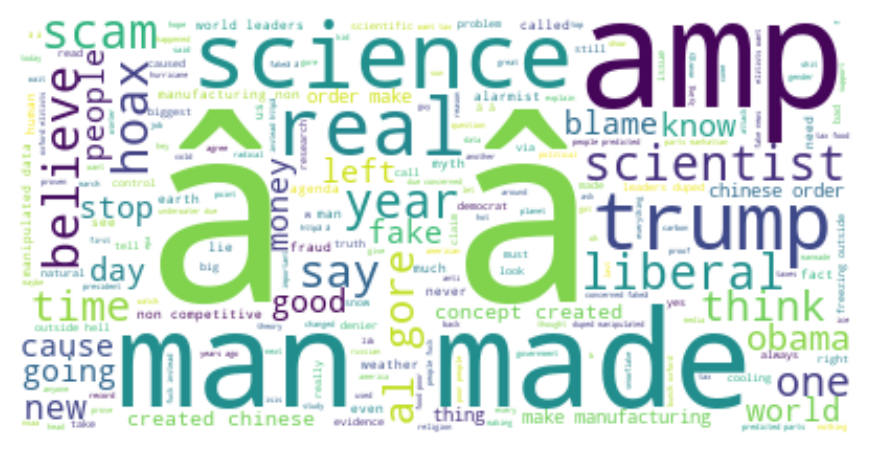

In [34]:
neg_cloud = WordCloud(background_color='white').generate(neg_string) #creating and generating word cloud image 
plt.imshow(neg_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

Neutral WordCloud:

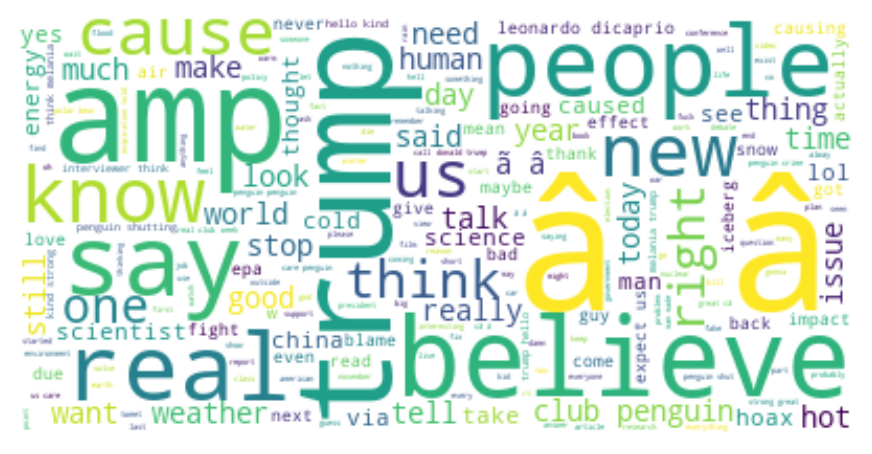

In [35]:
neu_cloud = WordCloud(background_color='white').generate(neu_string) #creating and generating word cloud image 
plt.imshow(neu_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

News WordCloud:

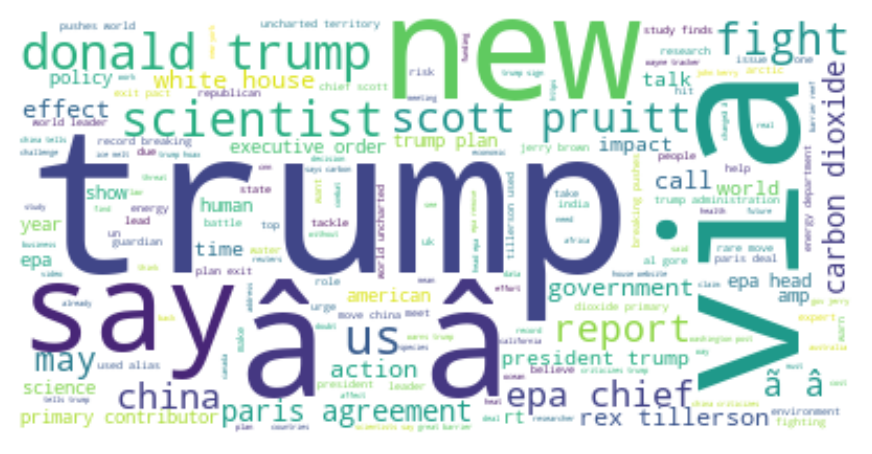

In [36]:
new_cloud = WordCloud(background_color='white').generate(new_string) #creating and generating word cloud image 
plt.imshow(new_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

# Feature Engineering and Selection

In [37]:
# Creating Lemmatizer Function
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, text):
        return [self.wnl.lemmatize(t) for t in word_tokenize(text)]

TfidfVectorizer:

In [38]:
# building and fitting the vectorizer
vect = TfidfVectorizer(ngram_range=(1,3), min_df = 1, max_df = 0.90, 
                       strip_accents = 'unicode', tokenizer = LemmaTokenizer(), stop_words = stop_words) 
# transforming the 'clean_txt' column
X_clean_txt = vect.fit_transform(df_train.clean_txt) 

In [39]:
# Use these values for 'X' and 'y' in 'train_test_split':
y = df_train['sentiment']
X = df_train['clean_txt']

### Balancing the Classes

In [40]:
# Over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_clean_txt, y)
print(sorted(Counter(y_train).items()))

[(-1, 8530), (0, 8530), (1, 8530), (2, 8530)]


# Model Selection

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [42]:
from sklearn.model_selection import train_test_split

# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X_clean_txt, y, test_size=0.2, random_state=42)

In [43]:
clean_message_tfidf = vect.transform(test['message'])

In [44]:
test.drop(columns="message", inplace=True)

### Logistic Regression Model

In [45]:
# Training the logistic regression model on our balanced data
logreg = LogisticRegression(random_state = 5)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [46]:
# Generate predictions for test portion of training dataset
y_train_pred = logreg.predict(X_test)

In [47]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(logreg)
print(classification_report(y_test, y_train_pred))
print('F1_score: ',round(metrics.f1_score(y_test, y_train_pred, average = 'weighted'),5))

LogisticRegression(random_state=5)
              precision    recall  f1-score   support

          -1       0.94      0.12      0.22       278
           0       0.90      0.11      0.19       425
           1       0.65      0.96      0.78      1755
           2       0.84      0.58      0.69       706

    accuracy                           0.69      3164
   macro avg       0.83      0.44      0.47      3164
weighted avg       0.75      0.69      0.63      3164

F1_score:  0.62822


In [57]:
test_predictions = logreg.predict(clean_message_tfidf)

In [58]:
test["sentiment"] = test_predictions

In [59]:
test.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


### SVC Linear Model

In [51]:
# Training the Support Vector Machine model on our balanced data
SVClinear = SVC(kernel = 'linear', random_state = 5)
SVClinear.fit(X_train, y_train)

SVC(kernel='linear', random_state=5)

In [52]:
# Generate predictions for test portion of training dataset
y_train_pred = SVClinear.predict(X_test)

In [53]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(SVClinear)
print(classification_report(y_test, y_train_pred))
print('F1_score: ',round(metrics.f1_score(y_test, y_train_pred, average = 'weighted'),5))

SVC(kernel='linear', random_state=5)
              precision    recall  f1-score   support

          -1       0.89      0.26      0.40       278
           0       0.75      0.16      0.26       425
           1       0.68      0.94      0.79      1755
           2       0.82      0.66      0.73       706

    accuracy                           0.71      3164
   macro avg       0.78      0.50      0.54      3164
weighted avg       0.74      0.71      0.67      3164

F1_score:  0.67032


In [93]:
test_predictions = SVClinear.predict(clean_message_tfidf)

In [94]:
test["sentiment"] = test_predictions

In [95]:
test.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,2


### SVC rbf Model

In [54]:
# Training the Support Vector Machine model on our balanced data
SVCrbf = SVC(kernel = 'rbf', random_state = 5)
SVCrbf.fit(X_train, y_train)

SVC(random_state=5)

In [55]:
# Generate predictions for test portion of training dataset
y_train_pred = SVCrbf.predict(X_test)

In [56]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(SVCrbf)
print(classification_report(y_test, y_train_pred))
print('F1_score: ',round(metrics.f1_score(y_test, y_train_pred, average = 'weighted'),5))

SVC(random_state=5)
              precision    recall  f1-score   support

          -1       0.95      0.15      0.26       278
           0       0.92      0.10      0.19       425
           1       0.64      0.97      0.77      1755
           2       0.86      0.50      0.63       706

    accuracy                           0.68      3164
   macro avg       0.84      0.43      0.46      3164
weighted avg       0.75      0.68      0.62      3164

F1_score:  0.61544


In [60]:
test_predictions = SVCrbf.predict(clean_message_tfidf)

In [61]:
test["sentiment"] = test_predictions

In [64]:
test.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


### KNN K-Nearest Neighbors Model

In [65]:
# Training the Support KNN K-Nearest Neighbors model on our balanced data
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
# Generate predictions for test portion of training dataset
y_train_pred = KNN.predict(X_test)

In [67]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(KNN)
print(classification_report(y_test, y_train_pred))
print('F1_score: ',round(metrics.f1_score(y_test, y_train_pred, average = 'weighted'),5))

KNeighborsClassifier()
              precision    recall  f1-score   support

          -1       0.21      0.13      0.16       278
           0       0.16      0.92      0.27       425
           1       0.91      0.18      0.29      1755
           2       0.91      0.19      0.32       706

    accuracy                           0.27      3164
   macro avg       0.55      0.35      0.26      3164
weighted avg       0.75      0.27      0.28      3164

F1_score:  0.28419


In [68]:
test_predictions = KNN.predict(clean_message_tfidf)

In [69]:
test["sentiment"] = test_predictions

In [70]:
test.head()

,tweetid,sentiment
0,169760,0
1,35326,0
2,224985,0
3,476263,0
4,872928,0


### Decision Tree Model

In [71]:
# Training the Decision Tree model on our balanced data
DT = DecisionTreeClassifier(max_depth=6)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [72]:
# Generate predictions for test portion of training dataset
y_train_pred = DT.predict(X_test)

In [73]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(DT)
print(classification_report(y_test, y_train_pred))
print('F1_score: ',round(metrics.f1_score(y_test, y_train_pred, average = 'weighted'),5))

DecisionTreeClassifier(max_depth=6)
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       278
           0       0.72      0.04      0.08       425
           1       0.59      0.92      0.72      1755
           2       0.59      0.35      0.44       706

    accuracy                           0.59      3164
   macro avg       0.48      0.33      0.31      3164
weighted avg       0.56      0.59      0.51      3164

F1_score:  0.50814


In [74]:
test_predictions = DT.predict(clean_message_tfidf)

In [75]:
test["sentiment"] = test_predictions

In [84]:
test.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


### Random Forest Model

In [77]:
# Training the Random Forest model on our balanced data
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
# Generate predictions for test portion of training dataset
y_train_pred = RF.predict(X_test)

In [79]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(RF)
print(classification_report(y_test, y_train_pred))
print('F1_score: ',round(metrics.f1_score(y_test, y_train_pred, average = 'weighted'),5))

RandomForestClassifier()
              precision    recall  f1-score   support

          -1       0.83      0.26      0.39       278
           0       0.52      0.36      0.42       425
           1       0.70      0.90      0.79      1755
           2       0.80      0.60      0.69       706

    accuracy                           0.70      3164
   macro avg       0.71      0.53      0.57      3164
weighted avg       0.71      0.70      0.68      3164

F1_score:  0.68009


In [80]:
test_predictions = RF.predict(clean_message_tfidf)

In [81]:
test["sentiment"] = test_predictions

In [82]:
test.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


# Submission

In [124]:
test.to_csv('logreg.csv', index=False)

In [125]:
test.to_csv('SVClinear.csv', index=False)

In [126]:
test.to_csv('SVCrbf.csv', index=False)

In [127]:
test.to_csv('KNN.csv', index=False)

In [128]:
test.to_csv('DT.csv', index=False)

In [85]:
test.to_csv('RF.csv', index=False)

### Save File to Pickle

In [ ]:
model_save_path = "logreg_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(test, file)

In [ ]:
model_save_path = "SVCLinear_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(test, file)

In [ ]:
model_save_path = "SVCrbf_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(test, file)

In [ ]:
model_save_path = "KNN_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(test, file)

In [ ]:
model_save_path = "DT_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(test, file)

In [ ]:
model_save_path = "RF_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(test, file)

# Conclusion